#  Cinética Química
## Dependencia de k (constante cinética) con la temperatura: Ecuación de Arrhenius.

In [1]:
%matplotlib notebook
import seaborn
#from sympy import pretty_print as pp, latex
import numpy as np
import IPython.core.display as di
import matplotlib.pyplot as mpl
import random
import math
import pandas as pd
pd.set_option('display.notebook_repr_html', True)
from ipywidgets import interact
import notebook
from IPython.display import clear_output, display, HTML, Image,Math, Latex
from IPython.external import mathjax
#import Pint

FigureSize=(7,5)


display(HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Mostrar código')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Esconder código')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Mostrar código"></form>'''))

display(HTML('<h1 style="color:#000000"><strong>Avanzar para generar datos</strong></h1>'))


In [2]:
n=int(input("Nº de puntos: "))

#Generación de valores aleatorios de K

def generador_parametros(): #generarción de parámetros de la ecuación y sus intervalos de confianza

    Ea=random.uniform(30.0,150.0)
    Ln_K = random.uniform(1.0, 20)
    inter_Ea=random.uniform(-1.,1.0)
    inter_Ln = random.uniform(-0.01, 0.01)

    return Ea,Ln_K,inter_Ea,inter_Ln



def generador_Valores(n):
    k=np.array([])
    T = np.array([])
    Ea, Ln_K, inter_Ea, inter_Ln=generador_parametros()
    #x = [random.uniform(0., 100.), random.uniform(0., 100.)]
    x=[random.uniform(0., 100.),random.uniform(20., 50.)]

    # T =np.linspace(min(x), max(x), n)
    T = np.linspace(x[0], sum(x), n)
    for i in T:
        k=np.append(k,(math.exp(random.random()*inter_Ln+Ln_K)*math.exp((random.random()*inter_Ea+Ea)*(-1000.)/(8.31*(i+273.)))))
    #print ("k0: ",(math.exp(random.random()*inter_Ln+Ln_K)),' Ln k0: ',random.random()*inter_Ln+Ln_K)
    #print ('Termino Exponencial: ',math.exp((random.random()*inter_Ea+Ea)*(-1000.)/(8.31*(i+273.))),"\n")

    #return T,k,Ea,Ln_K

    return T,k

while True:
    T,k=generador_Valores(n)
    if k[-1]>10**-5 and k[0]<10**-3:
        break

data=dict()
#data['k (L/mol·min)']=valores_k.tolist()



valores_T=np.round(T,1)
k1=np.round(k*10**5,1)
valores=[valores_T,k1]

data['k (L/mol·min)·1E5']=k1.tolist()
data['Temperatura (ºC)']=valores_T.tolist()


values = pd.DataFrame(data, columns=['k (L/mol·min)·1E5', 'Temperatura (ºC)'])
values.style.set_properties(align="right")
values.set_index('Temperatura (ºC)',inplace=True)
display(values)


display(HTML('<h1 style="color:#000000""><strong>Avanzar para mostrar representación gráfica</strong></h1>'))

Nº de puntos: 10


,k (L/mol·min)·1E5
Temperatura (ºC),
32.3,23.7
35.4,32.3
38.4,31.9
41.5,40.3
44.6,57.4
47.6,56.9
50.7,81.7
53.8,84.5
56.8,96.3


<IPython.core.display.Javascript object>


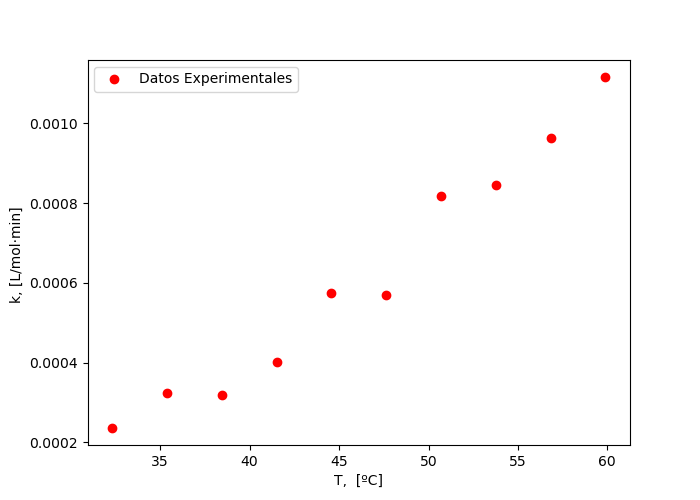

In [3]:
mpl.figure('figure1',figsize=FigureSize)


mpl.plot(T,k, 'ro',label = 'Datos Experimentales')
mpl.xlabel('T,  [ºC]')
mpl.ylabel('k, [L/mol·min] ')
mpl.legend(loc = 'best')
mpl.show()
display(HTML('<h1 style="color:#000000"><strong>Avanzar para mostrar resultado</strong></h1>'))

<IPython.core.display.Javascript object>


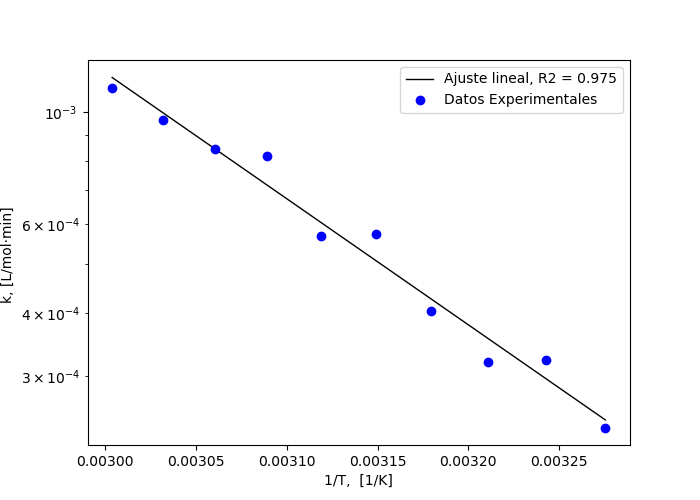

Pendiente:  -5751.31 
Ordenada:  10.526

Ea (kJ/mol):  47.8  k0 (L/mol·min):  3.725e+04


In [4]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = np.corrcoef(x, y)[0,1]

     # r
    results['correlation'] = correlation
    r_squared=correlation**2
    results['determination'] = correlation**2

    return r_squared,coeffs


T1=1/(T+273)
Ln_K=np.log(k)
r_squared,coeffs=polyfit(T1, Ln_K,1)

estYVals = np.polyval(coeffs, T1)

mpl.figure('figure2',figsize=FigureSize)

YVals=np.exp(estYVals)
mpl.semilogy(T1,YVals, 'k-', linewidth = 1,label = 'Ajuste lineal' + ', R2 = ' + str(round(r_squared, 3)))
mpl.semilogy(T1,k, 'bo',label = 'Datos Experimentales')
mpl.xlabel('1/T,  [1/K]')
mpl.ylabel('k, [L/mol·min] ')
mpl.legend(loc = 'best')

mpl.show()

def formatE_decimal(x, prec=2):
    """ Examples:
    >>> formatE_decimal('0.1613965',10)
    '1.6139650000E-01'
    >>> formatE_decimal('0.1613965',5)
    '1.61397E-01'
    >>> formatE_decimal('0.9995',2)
    '1.00E+00'
    """
    xx=decimal.Decimal(x) if type(x)==type("") else x 
    tup = xx.as_tuple()
    xx=xx.quantize( decimal.Decimal("1E{0}".format(len(tup[1])+tup[2]-prec-1)), decimal.ROUND_HALF_UP )
    tup = xx.as_tuple()
    exp = xx.adjusted()
    sign = '-' if tup.sign else ''
    dec = ''.join(str(i) for i in tup[1][1:prec+1])   
    if prec>0:
        return '{sign}{int}.{dec}E{exp:+03d}'.format(sign=sign, int=tup[1][0], dec=dec, exp=exp)
    elif prec==0:
        return '{sign}{int}E{exp:+03d}'.format(sign=sign, int=tup[1][0], exp=exp)
    else:
        return None


def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

print ("Pendiente: ",'%.6g' % coeffs[0], "\nOrdenada: ",'%.5g' % coeffs[1] )


Ea_estimado=-coeffs[0]*8.314/1000
k_estimado=np.exp(coeffs[1])

print ("\nEa (kJ/mol): ",round(Ea_estimado,1), " k0 (L/mol·min): ", '%.3e' % k_estimado);

In [5]:
display(HTML('''

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Programado con Jupyter Notebook en Python 3.6. </footer>'''))